In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
### text preprocessing 

In [8]:
import re 
import string

In [9]:
### conver to uppercase to lowercase

In [10]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [11]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [13]:
###  Remove links 

In [14]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', word, flags=re.MULTILINE) for word in str(x).split()))

In [15]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [16]:
### Remove punctuations

In [17]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [18]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [19]:
### Remove Numbers 

In [20]:
data["tweet"] = data['tweet'].str.replace(r'\d+', '', regex=True)

In [21]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [22]:
### Remove Stopwords 

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
     sw = file.read().splitlines()

In [27]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x for x in x.split() if x not in sw))

In [29]:
data["tweet"].head(5)


0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

In [30]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [31]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(ps.stem(x) for x in x.split()))

In [32]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [33]:
### Building Vacubulary

In [34]:
from collections import Counter
vocab = Counter()

In [35]:
vocab

Counter()

In [36]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [37]:
len(vocab)

15949

In [38]:
data.shape

(7920, 3)

In [39]:
tokens = [key for key in vocab if vocab[key] > 10]

In [40]:
len(tokens)

1145

In [41]:
def save_vocabulary(lines, filename):
  data = '\n'.join(lines)
  file = open(filename, 'w', encoding="utf-8")
  file.write(data)
  file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [42]:
### Devide dataset

In [43]:
x= data['tweet']
y= data['label']

In [44]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [45]:
! pip install scikit_learn

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
X_train.shape

(6336,)

In [48]:
X_test.shape

(1584,)

In [49]:
###Vectorization

In [50]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new

In [51]:
vectorized_x_train = vectorizer(X_train, tokens)

In [52]:
vectorized_x_test = vectorizer(X_test, tokens)

In [53]:
vectorized_x_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [54]:
vectorized_x_test


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [55]:
y_train.value_counts()

label
0    4750
1    1586
Name: count, dtype: int64

In [56]:
### Handel imbalance datast

In [57]:
!pip install imbalanced-learn

In [58]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9500, 1145) (9500,)


In [59]:
y_train_smote.value_counts()

label
0    4750
1    4750
Name: count, dtype: int64

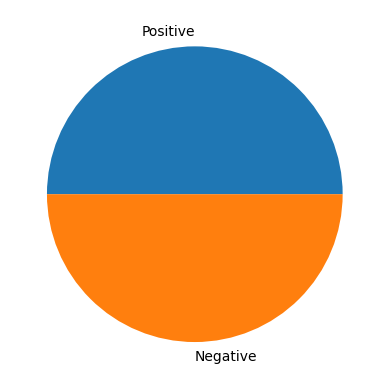

In [60]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote. value_counts()[1]]), labels=['Positive', 'Negative' ])
plt.show()

In [61]:
### MOdel training and evaluation 

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [63]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
   acc = round(accuracy_score(y_act, y_pred), 3)
   pr = round(precision_score(y_act, y_pred), 3)
   rec = round(recall_score(y_act, y_pred), 3)
   f1 = round(f1_score(y_act, y_pred), 3)
   print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Scor= {f1}')

In [64]:
### Logistic Regression

In [65]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.943
	Precision = 0.92
	Recall = 0.97
	F1-Score = 0.944
Testing Scores:
	Accuracy = 0.871
	Precision = 0.736
	Recall = 0.836
	F1-Scor= 0.783


In [78]:
import pickle

with open('../static/model/modelLR.pickle', 'wb') as file:
   pickle.dump(lr, file)

In [67]:
### Naive Bayse


In [68]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.907
	Precision = 0.869
	Recall = 0.96
	F1-Score = 0.912
Testing Scores:
	Accuracy = 0.876
	Precision = 0.71
	Recall = 0.934
	F1-Scor= 0.807


In [69]:
### DEcision Tree 

In [70]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.823
	Precision = 0.693
	Recall = 0.652
	F1-Scor= 0.672


In [71]:
### Random Fores                            

In [72]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.867
	Precision = 0.784
	Recall = 0.718
	F1-Scor= 0.75


In [73]:
### Suport Vector Machine

In [74]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.962
	Recall = 0.996
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.867
	Precision = 0.748
	Recall = 0.784
	F1-Scor= 0.766


In [75]:
### FInal model selection  is Logistic Regression

In [76]:
### final ai model 

In [79]:
import numpy as np
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from pathlib import Path

# Assuming you have X_raw (text data) and y (labels) already defined
# Split data into train and test sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Create preprocessing and modeling pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(random_state=42, max_iter=1000))
])

# Define hyperparameter grid
param_grid = {
    'tfidf__max_features': [5000, 10000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'smote__sampling_strategy': ['auto', 0.5, 0.75],
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga'],
    'clf__class_weight': [None, 'balanced']
}

# Configure grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

# Train model
print("Starting grid search...")
grid_search.fit(X_train_raw, y_train)
print("Grid search complete!")

# Save best model
best_model = grid_search.best_estimator_
model_path = Path('../static/model/model.pickle')

# Create directory if not exists
model_path.parent.mkdir(parents=True, exist_ok=True)

with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)
print(f"\nModel saved to {model_path}")

# Evaluation functions
def print_scores(y_true, y_pred, label=''):
    scores = {
        'Accuracy': round(accuracy_score(y_true, y_pred), 3),
        'Precision': round(precision_score(y_true, y_pred), 3),
        'Recall': round(recall_score(y_true, y_pred), 3),
        'F1-Score': round(f1_score(y_true, y_pred), 3)
    }
    print(f'\n{label} Scores:')
    for metric, value in scores.items():
        print(f'\t{metric} = {value}')
    return scores

# Final evaluation
print("\nBest Parameters:")
print(grid_search.best_params_)

# Training evaluation
y_train_pred = best_model.predict(X_train_raw)
_ = print_scores(y_train, y_train_pred, 'Training')

# Testing evaluation
y_test_pred = best_model.predict(X_test_raw)
_ = print_scores(y_test, y_test_pred, 'Testing')

# Cross-validation results
print(f"\nBest Cross-validation Score: {round(grid_search.best_score_, 3)}")

Starting grid search...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Grid search complete!

Model saved to ..\static\model\model.pickle

Best Parameters:
{'clf__C': 1, 'clf__class_weight': None, 'clf__penalty': 'l2', 'clf__solver': 'liblinear', 'smote__sampling_strategy': 0.75, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}

Training Scores:
	Accuracy = 0.929
	Precision = 0.825
	Recall = 0.919
	F1-Score = 0.869

Testing Scores:
	Accuracy = 0.89
	Precision = 0.768
	Recall = 0.817
	F1-Score = 0.792

Best Cross-validation Score: 0.887
